In [33]:
import pandas as pd
import numpy as np
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
df = pd.read_csv('data_final_processed.csv')

In [35]:
print(df.head())

   Hour                      Title  Date  Month  DayOfWeek  Year  \
0     0  9/11 Cafe & Concept Store     1      1          6  2024   
1     1  9/11 Cafe & Concept Store     1      1          6  2024   
2     2  9/11 Cafe & Concept Store     1      1          6  2024   
3     3  9/11 Cafe & Concept Store     1      1          6  2024   
4     4  9/11 Cafe & Concept Store     1      1          6  2024   

   OccupancyPercent TimeCategory  
0               0.0        Night  
1               0.0        Night  
2               0.0        Night  
3               0.0        Night  
4               0.0        Night  


In [36]:
df.isnull().sum()

Hour                0
Title               0
Date                0
Month               0
DayOfWeek           0
Year                0
OccupancyPercent    0
TimeCategory        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78840 entries, 0 to 78839
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              78840 non-null  int64  
 1   Title             78840 non-null  object 
 2   Date              78840 non-null  int64  
 3   Month             78840 non-null  int64  
 4   DayOfWeek         78840 non-null  int64  
 5   Year              78840 non-null  int64  
 6   OccupancyPercent  78840 non-null  float64
 7   TimeCategory      78840 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB


In [38]:
unique_values = df['Title'].nunique()
print(unique_values)

9


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PlaceEncoded'] = label_encoder.fit_transform(df['Title'])


In [40]:

time_category_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

df['TimeCategory'] = df['TimeCategory'].map(time_category_mapping)


In [41]:
df.head(1000)

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
...,...,...,...,...,...,...,...,...,...
995,11,9/11 Cafe & Concept Store,4,6,6,2024,35.832958,0,0
996,12,9/11 Cafe & Concept Store,4,6,6,2024,59.346500,1,0
997,13,9/11 Cafe & Concept Store,4,6,6,2024,67.812271,1,0
998,14,9/11 Cafe & Concept Store,4,6,6,2024,70.979673,1,0


In [42]:
df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Date'].astype(str))


In [43]:
df

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded,Datetime
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
...,...,...,...,...,...,...,...,...,...,...
78835,19,Batu Bolong Temple,31,12,6,2024,0.0,2,8,2024-12-31
78836,20,Batu Bolong Temple,31,12,6,2024,0.0,2,8,2024-12-31
78837,21,Batu Bolong Temple,31,12,6,2024,0.0,3,8,2024-12-31
78838,22,Batu Bolong Temple,31,12,6,2024,0.0,3,8,2024-12-31


In [44]:
features = df[['Datetime', 'PlaceEncoded']]
target = df['OccupancyPercent']


In [45]:

# Atau, jika kita ingin kombinasi seperti concat:
df['Day_Hour'] = df['Date'].astype(str) + "_" + df['Hour'].astype(str)
df['Day_Occupancy'] = df['Date'] * df['OccupancyPercent']
max_occupancy = df.groupby('PlaceEncoded')['OccupancyPercent'].transform('max')
df['NormalizedOccupancy'] = df['OccupancyPercent'] / max_occupancy

df.head(150)

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded,Datetime,Day_Hour,Day_Occupancy,NormalizedOccupancy
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_0,0.0,0.0
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_1,0.0,0.0
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_2,0.0,0.0
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_3,0.0,0.0
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_1,0.0,0.0
146,2,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_2,0.0,0.0
147,3,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_3,0.0,0.0
148,4,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_4,0.0,0.0


In [46]:
df[['PlaceEncoded', 'Day_Occupancy','TimeCategory', 'Day_Hour','OccupancyPercent']].corr()


,PlaceEncoded,Day_Occupancy,TimeCategory,Day_Hour,OccupancyPercent
PlaceEncoded,1.000000e+00,-0.070935,-4.849254e-16,6.698630e-15,-0.088785
Day_Occupancy,-7.093473e-02,1.000000,-2.806297e-01,6.195772e-01,0.801012
TimeCategory,-4.849254e-16,-0.280630,1.000000e+00,2.131128e-02,-0.350869
Day_Hour,6.698630e-15,0.619577,2.131128e-02,1.000000e+00,0.377616
OccupancyPercent,-8.878522e-02,0.801012,-3.508686e-01,3.776161e-01,1.000000


In [47]:
# Memisahkan fitur dan target
y = df['OccupancyPercent'].values.reshape(-1, 1) # Target
X = df[['Day_Occupancy', 'Day_Hour', 'PlaceEncoded','TimeCategory']]


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # Use transform, not fit_transform

# Normalize target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
# Do not fit the scaler on y_test, just transform it
y_test_scaled = scaler_y.transform(y_test)


In [49]:
# Membuat model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Layer input + hidden pertama
    Dropout(0.3),  # Dropout untuk mencegah overfitting
    Dense(128, activation='relu'),  # Hidden layer kedua
    Dropout(0.3),
    Dense(1, activation='linear')  # Output layer (untuk regresi, gunakan aktivasi 'linear')
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Menggunakan MSE untuk regresi


In [51]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='loss',  # Monitor the training loss (since there's no validation data)
    patience=10,      # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True,  # Restore the best weights after training stops
    verbose=1         # Print out messages when early stopping is triggered
)

# Melatih model
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=80, batch_size=32)


Epoch 1/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0135 - mae: 0.0739 - val_loss: 0.0045 - val_mae: 0.0373
Epoch 2/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0058 - mae: 0.0475 - val_loss: 0.0027 - val_mae: 0.0266
Epoch 3/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0046 - mae: 0.0426 - val_loss: 0.0021 - val_mae: 0.0247
Epoch 4/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0409 - val_loss: 0.0022 - val_mae: 0.0256
Epoch 5/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0039 - mae: 0.0398 - val_loss: 0.0015 - val_mae: 0.0200
Epoch 6/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0035 - mae: 0.0384 - val_loss: 0.0019 - val_mae: 0.0205
Epoch 7/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0035 - mae: 0.0379 - val_loss: 0.0015 - val_mae: 0.0172
Epoch 8/80
1971/1971 [==============================] - 3s 2ms

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have your predictions and actual values
# predicted_values_original: your model's predictions in original scale
# y_test_original: actual values in original scale

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_original, predicted_values_original)
mse = mean_squared_error(y_test_original, predicted_values_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predicted_values_original)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Mean Absolute Error (MAE): 1.4091745064380274
Mean Squared Error (MSE): 8.162585584489332
Root Mean Squared Error (RMSE): 2.8570239033808122
R-squared (R²): 0.9925117234908886


In [54]:
 #Make predictions
predicted_values_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions
predicted_values_original = scaler_y.inverse_transform(predicted_values_scaled)

# Inverse transform the actual values for comparison
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Display some results
for i in range(5):
    print(f"Predicted: {predicted_values_original[i][0]}, Actual: {y_test_original[i][0]}")

493/493 [==============================] - 1s 936us/step
Predicted: 1.6254454851150513, Actual: 0.0
Predicted: 85.34407806396484, Actual: 86.89826609060687
Predicted: 0.5598872900009155, Actual: 0.0
Predicted: 43.702274322509766, Actual: 44.27403066367573
Predicted: 0.6121724843978882, Actual: 0.0


In [73]:
# Assuming you have the following variables from your previous code:
# y_test_original: actual occupancy percentages (inverse transformed)
# predicted_values_original: predicted occupancy percentages (inverse transformed)
# X_test: the original test features (before scaling)

# Decode the place from the encoded values
decoded_places = label_encoder.inverse_transform(X_test['PlaceEncoded'])

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date_Hour': X_test['Day_Hour'],
    'Place': decoded_places,
    'Actual_Occupancy': y_test_original.flatten(),  # Flatten to convert to 1D array
    'Predicted_Occupancy': predicted_values_original.flatten()  # Flatten to convert to 1D array
})

# Display the first few rows of the results DataFrame
results_df

,Date_Hour,Place,Actual_Occupancy,Predicted_Occupancy
3200,12_8,9/11 Cafe & Concept Store,0.000000,1.625445
67718,23_14,Banyumala twin waterfalls,86.898266,85.344078
74088,14_0,Batu Bolong Temple,0.000000,0.559887
60042,26_18,BATIK Restaurant,44.274031,43.702274
6312,22_0,9/11 Cafe & Concept Store,0.000000,0.612172
...,...,...,...,...
75363,19_3,Batu Bolong Temple,0.000000,0.686279
36330,5_18,BAKED. Berawa,61.646335,58.590149
36954,7_18,BAKED. Berawa,52.976703,52.022869
25134,27_6,Air Terjun Munduk,36.904043,35.007767


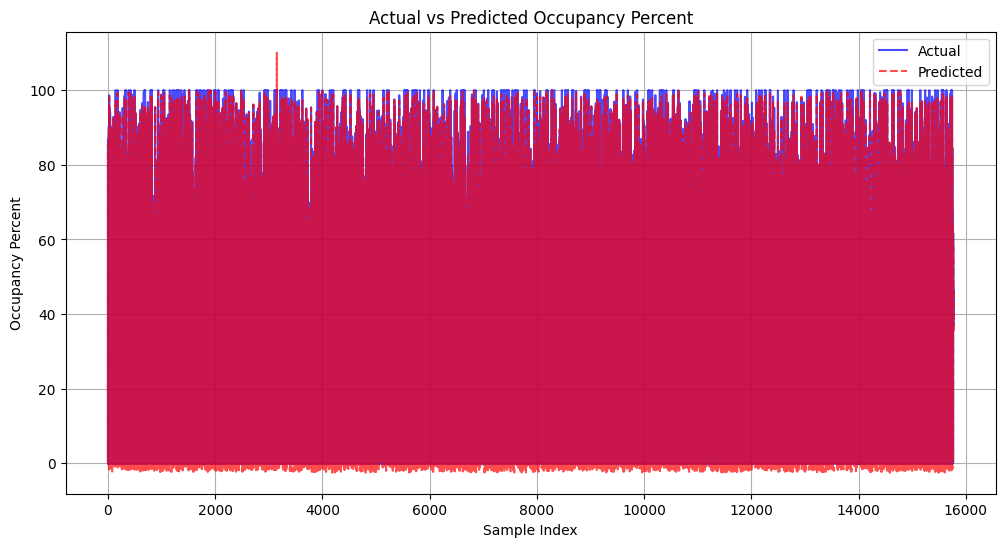

In [59]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue', alpha=0.7, linewidth=1.5)
plt.plot(predicted_values_original, label='Predicted', color='red', alpha=0.7, linestyle='--', linewidth=1.5)
plt.title('Actual vs Predicted Occupancy Percent')
plt.xlabel('Sample Index')
plt.ylabel('Occupancy Percent')
plt.legend()
plt.grid(True)
plt.show()

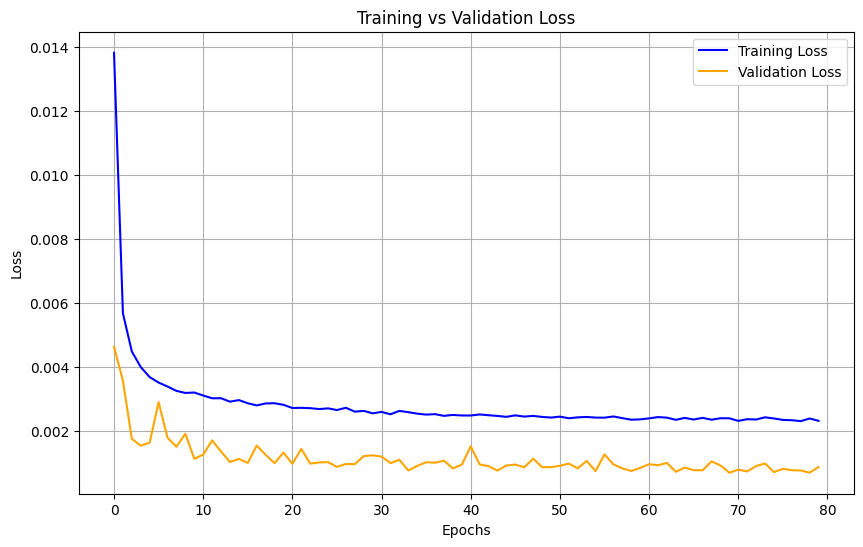

In [60]:
# Plot Training vs Validation Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
# Save the model
model.save('occupancy_model.h5')

c:\Users\devon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('occupancy_model.h5')

In [ ]:

# Example new data 
new_data = pd.DataFrame({
    'Day_Occupancy': [10, 20, 5],  # Example values
    'Day_Hour': ['1_11', '1_15', '1_20'],  # Example values
    'PlaceEncoded': [0, 0, 0],  # Example encoded values
    'TimeCategory': [0, 1, 3]  # Example time categories
})

new_data_scaled = scaler_X.transform(new_data)

predictions_scaled = loaded_model.predict(new_data_scaled)

predictions_original = scaler_y.inverse_transform(predictions_scaled)

for i in range(len(predictions_original)):
    print(f"Predicted Occupancy Percent for sample {i}: {predictions_original[i][0]}")

1/1 [==============================] - 0s 20ms/step
Predicted Occupancy Percent for sample 0: 3.2787933349609375
Predicted Occupancy Percent for sample 1: 22.832992553710938
Predicted Occupancy Percent for sample 2: 1.3053059577941895
